In [1]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
from scipy.spatial import distance
import pandas as pd

In [2]:

face_model = cv2.CascadeClassifier('./Resources/haarcascade_frontalface_default.xml')

img = cv2.imread('./Resources/Experiment/people5.jpg')



#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [3]:
model = load_model("./Saved_Model/keras_model.hdf5")

In [4]:
# Make predictions on the testing set
sample_img = cv2.resize(img,(128,128))
sample_img = np.reshape(sample_img,[1,128,128,3])
sample_img = sample_img/255.0
pred = model.predict(sample_img)

pred

array([[0.35699853]], dtype=float32)

1
1
0


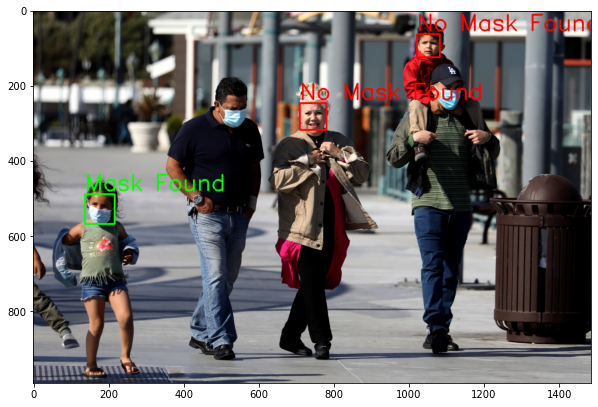

In [25]:
import matplotlib.pyplot as plt
mask_label = {0:'Mask Found',1:'No Mask Found'}
color_label = {0:(0,255,0),1:(255,0,0)}
MIN_DISTANCE = 0

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=5)

#check for no. of faces in the image
# if more than one face found,
if len(faces)>=1:
    label = [0 for i in range(len(faces))]
#     for i in range(len(faces)-1):
#         for j in range(i+1, len(faces)):
#             dist = distance.euclidean(faces[i][:2],faces[j][:2])
#             if dist<MIN_DISTANCE:
#                 label[i] = 1
#                 label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    
    # For every face found,  
    
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0        
        mask_result = model.predict(crop)
        print(round(mask_result[0][0]))
        
        cv2.putText(new_img,mask_label[round(mask_result[0][0])],(x, y-10), cv2.FONT_HERSHEY_SIMPLEX,2,color_label[round(mask_result[0][0])],3)
        cv2.rectangle(new_img,(x,y),(x+w,y+h), color_label[round(mask_result[0][0])],3)
        
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
    predicted_path = "./static/Images/predicted_image.jpg"
    plt.savefig(predicted_path)
            
else:
    print("No image")